Análisis de datos en salud
============================

Unidad 7
-----------------------------------------------------


El grafo de las familias florentinas es una red social histórica que representa las relaciones entre algunas de las principales familias de Florencia durante el Renacimiento.

El grafo modela las alianzas matrimoniales y económicas entre las familias influyentes de Florencia en el siglo XV. Cada nodo representa una familia noble, y cada arista indica una relación de matrimonio o alianza política entre dos familias.

Este grafo se basa en los estudios de John Padgett y Christopher Ansell (1993) sobre redes sociales y dinámicas políticas en el Renacimiento. Algunas de las familias más conocidas son:
- Medici: La familia más poderosa, con múltiples conexiones.
- Strozzi: Rivales de los Medici.
- Albizzi: Otra familia influyente, también enemiga de los Medici.
- Pazzi: Conocidos por la conspiración contra los Medici.

### Ejercicio 1

Primero de todo vamos a explorar un poco el grafo y su estructua.

a) Carga el grafo de las familias Florentinas de NetworkX (florentine_families_graph) y visualizalo con Matplotlib. **(0.5 puntos)**

b) Calcula y muestra el número de nodos y aristas del grafo. **(0.5 puntos)**

c) ¿Cuál es el grado (*degree*) medio de los nodos? ¿Qué familia es más conectada? **(0.5 puntos)**

d) Calcula la centralidad de intermediación para identificar la familia que actua como puente. **(0.5 puntos)**

e) ¿Existen grupos separados o está todo conectado? **(0.5 puntos)**

**Nota**: Puedes usar la función number_connected_components para responder a la pregunta.

f) ¿Se pueden agrupar familias en facciones? Usa la función `greedy_modularity_communities` para detectar comunidades. Visualiza el grafo con las comunidades con distinto color. **(1 punto)**

**(3.5 puntos)**

In [13]:
# Respuesta

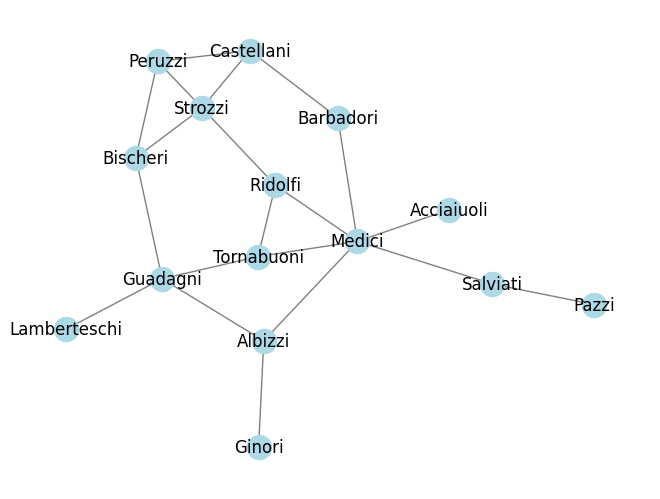

In [14]:
# Cargamos las librerías necesarias
import networkx as nx
import matplotlib.pyplot as plt

## a)

# Cargamos el grafo Petersen de la librería networkx
G = nx.florentine_families_graph()

# Visualizamos el gráfico
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')
plt.show()

In [15]:
## b)

# Guardamos el número de nodos y aristas
num_nodos = G.number_of_nodes()
num_aristas = G.number_of_edges()

# Mostramos el resultado por pantalla
print(f'Nodos: {num_nodos}, Aristas: {num_aristas}')

Nodos: 15, Aristas: 20


In [16]:
## c)

# Calculamos el grado medio y el máximo
grado_medio = sum(dict(G.degree()).values()) / G.number_of_nodes()
nodo_max_grado = max(G.degree, key=lambda x: x[1])

# Mostramos el resultado por pantalla
print(f'Grado medio: {grado_medio}')
print(f'Familia más conectada: {nodo_max_grado[0]} con {nodo_max_grado[1]} conexiones')

Grado medio: 2.6666666666666665
Familia más conectada: Medici con 6 conexiones


In [17]:
## d)

# Calculamos la centralidad de intermediación para encontrar la familia puente
centralidad_intermediacion = nx.betweenness_centrality(G)
max_betweenness_family = max(centralidad_intermediacion, key=centralidad_intermediacion.get)

# Mostramos el resultado por pantalla
print(f'Família puente: {max_betweenness_family}')



Família puente: Medici


In [18]:
## e)

# Identificamos los componentes conectados (¿existen grupos separados?)
num_components = nx.number_connected_components(G)

print(f'Número de componentes del grafo: {num_components}')

Número de componentes del grafo: 1


Número de comunidades detectadas: 3


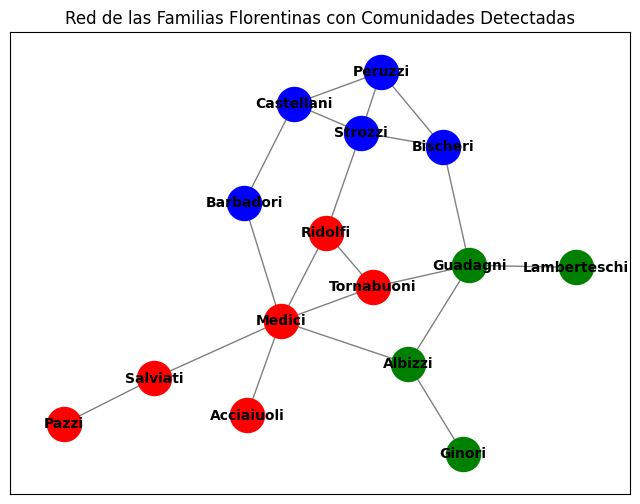

In [19]:
## f)

from networkx.algorithms.community import greedy_modularity_communities

# Detectamos las comunidades del grafo
communities = list(greedy_modularity_communities(G))
num_communities = len(communities)

print(f"Número de comunidades detectadas: {num_communities}")

# Visualización del grafo con comunidades
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[i % len(colors)], node_size=600)

nx.draw_networkx_edges(G, pos, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")
plt.title("Red de las Familias Florentinas con Comunidades Detectadas")
plt.show()

### Ejercicio 2

a) Comenta el siguiente código y explica su funcionamiento paso a paso, detallando cómo se genera el grafo y cómo se seleccionan los nodos a conectar. **(1 punto)**

b) Calcula la media del número de conexiones (*degree*) de los nodos del grafo. ¿Qué nodo tiene el mayor y el menos número de conexiones y cuántas conexiones tiene? **(0.5 puntos)**

c) Calcula el camino más corto entre el nodo más conectado (mayor *degree*) y el menos conectado (menor *degree*). Muestra visualmente este camino pintándolo de otro color en el grafo. **(1 punto)**

**(2.5 puntos)**

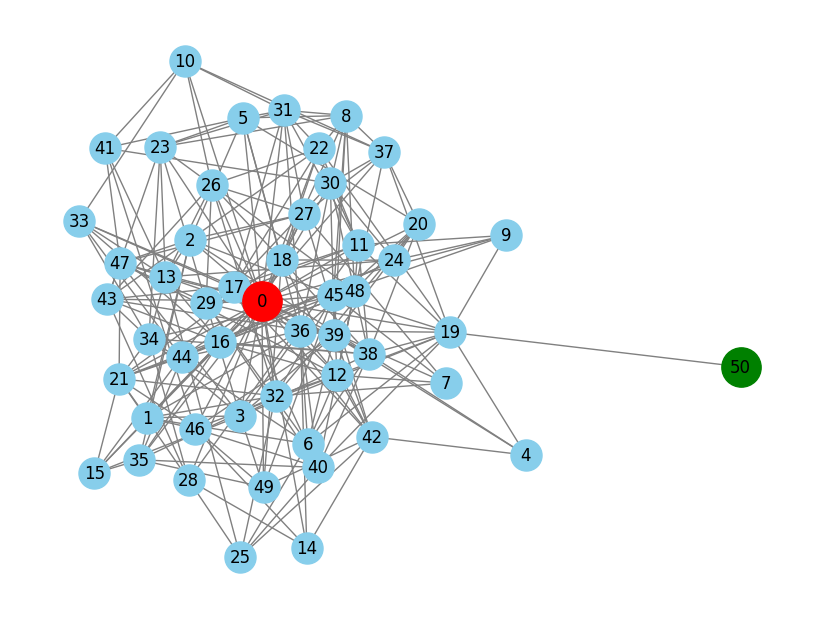

In [20]:
## a)
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Comentar el código

# Creamos un grafo de 50 nodos
# con 20% de probabilidad de conectarse con los otros
N = 50
p = 0.2

G = nx.erdos_renyi_graph(N, p)

# Creamos un nodo central
# con un 70% de probabilidad de conexión
nodo_central = 0
porcentaje_conexion = 0.7
num_conexiones = int(N * porcentaje_conexion)

# Seleccionamos 70% de nodos del grafo para conectarlos a este nodo central
otros_nodos = [n for n in G.nodes if n != nodo_central]
nodos_a_conectar = random.sample(otros_nodos, num_conexiones)

# Conectamos los nodos al nodo central
G.add_edges_from([(nodo_central, n) for n in nodos_a_conectar])

# Creamos un nuevo nodo que estará poco conectado con el resto
nodo_poco_conectado = N
N += 1

# Con solo un 2% de conexiones
porcentaje_conexion_poco = 0.02
num_conexiones_poco = int(N * porcentaje_conexion_poco)

# Repetimos el proceso, pero ahora solo lo conectamos
# a un 2% de los nodos de la red
otros_nodos_para_poco = [n for n in G.nodes if n != nodo_poco_conectado]
nodos_a_conectar_poco = random.sample(otros_nodos_para_poco, num_conexiones_poco)

G.add_edges_from([(nodo_poco_conectado, n) for n in nodos_a_conectar_poco])

# Mostramos el grafo especificando estos 2 nodos de distinto color
# Nodo central (rojo)
# Nodo aislado (verde)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=[nodo_central], node_color="red", node_size=800)
nx.draw_networkx_nodes(G, pos, nodelist=[nodo_poco_conectado], node_color="green", node_size=800)

plt.show()

In [21]:
## b)

# Calculamos de connexiones de los nodos del grafo
grado_mean = np.round(np.mean(G.degree),0)
print(f"La media de conexiones es {grado_mean}")

# Comprobamos qué nodo tiene más conexiones y cuantas
grado_max = max(G.degree, key=lambda x: x[1])
print(f"Nodo más conectado: {grado_max[0]} con {grado_max[1]} conexiones")

# Comprobamos qué nodo tiene menos conexiones y cuantas
grado_min = min(G.degree, key=lambda x: x[1])
print(f"Nodo menos conectado: {grado_min[0]} con {grado_min[1]} conexiones")



La media de conexiones es 17.0
Nodo más conectado: 0 con 39 conexiones
Nodo menos conectado: 50 con 1 conexiones


El nodo más conectado es el nodo 0 con 39 conexiones.
El nodo menos conectado es el nodo 50 con 1 conexiones.
El camino más corto entre el nodo más conectado y el menos conectado es: [0, 19, 50]


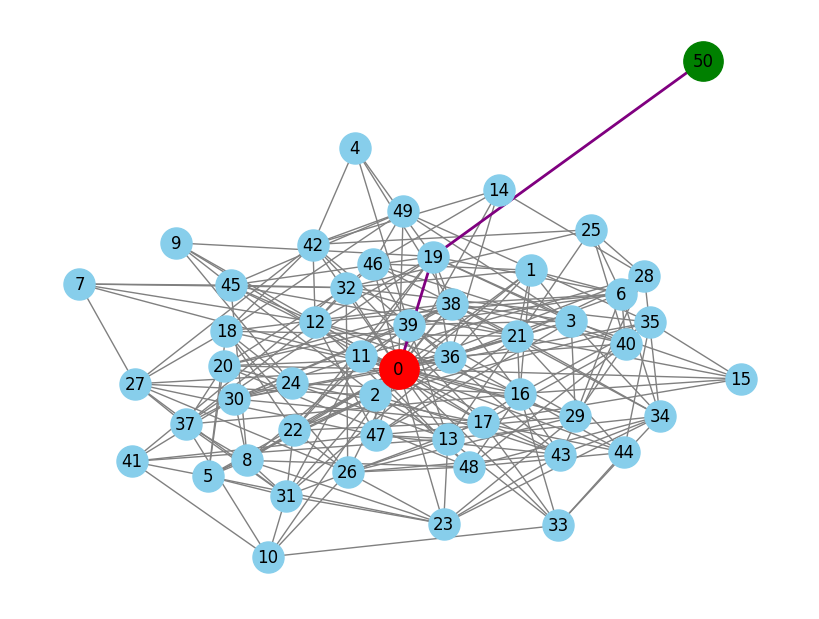

In [22]:
## c)

# Identificamos el nodo más conectado y el menos conectado
grado = dict(G.degree())
nodo_mas_conectado = max(grado, key=grado.get)  # Nodo con el mayor grado
nodo_menos_conectado = min(grado, key=grado.get)  # Nodo con el menor grado

# Calculamos el camino más corto entre el nodo más conectado y el menos conectado
camino_mas_corto = nx.shortest_path(G, source=nodo_mas_conectado, target=nodo_menos_conectado)

# Mostranos los resultados
print(f"El nodo más conectado es el nodo {nodo_mas_conectado} con {grado[nodo_mas_conectado]} conexiones.")
print(f"El nodo menos conectado es el nodo {nodo_menos_conectado} con {grado[nodo_menos_conectado]} conexiones.")
print(f"El camino más corto entre el nodo más conectado y el menos conectado es: {camino_mas_corto}")

# Visualizamos el grafo
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500)
# Representamos el nodo más conectado en rojo
nx.draw_networkx_nodes(G, pos, nodelist=[nodo_mas_conectado], node_color="red", node_size=800)
# Representamos el nodo menos conectado en verde
nx.draw_networkx_nodes(G, pos, nodelist=[nodo_menos_conectado], node_color="green", node_size=800)
# Resaltamos el camino más corto
camino_aristas = list(zip(camino_mas_corto, camino_mas_corto[1:]))
nx.draw_networkx_edges(G, pos, edgelist=camino_aristas, edge_color="purple", width=2)
plt.show()

## Ejercicio 3

a) Simula la propagación de una enfermedad (por ejemplo, la gripe) en el grafo anterior utilizando el modelo SIR (Susceptibles, Infectados, Recuperados) de la librería EoN. Parte del nodo más conectado identificado en el ejercicio 2 como el nodo infectado inicial. **(0.5 puntos)**

b) Calcula el valor máximo de infectados y el tiempo necesario para llegar a este pico. Muesta también las curvas de susceptibles, infectados y recuperados del modelo SIR. **(1 punto)**

c) Analiza las siguientes situaciones:

- ¿Cómo cambia el resultado si se escoge el nodo menos conectado como nodo inicial?
- ¿Y si se elimina del grafo el nodo más conectado?
- ¿Y si se modifican los valores de las tasa de infección y de recuperación?

**Nota 1**: Podéis usar la función `remove_node` para eliminar un nodo.

**Nota 2**: Compara los valores del máximo número de infectado y el tiempo necesario para llegar a este pico, y las curvas de susceptibles, infectados y recuperados entre los distintos escenarios/situaciones.

**(1.5 puntos)**

d) Modela la acción de la vacunación, considerando que el 20% de la población (nodos) está vacunada y no pueden ser infectados. ¿Qué efecto tiene la vacunación en la propagación de la enfermedad? **(1 punto)**

**Nota 3**: Se puede considerar que las personas vacunadas no pueden infectarse de la enfermedad. Explora la opción `initial_recovereds` de la función **fast_SIR** para representar este efecto.

**(4 puntos)**

In [23]:
!pip install EoN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for EoN: filename=EoN-1.2-py3-none-any.whl size=122468 sha256=fd7cde5fc04d4ae60c4ba7fdb89d38152fda299c1e12158bc4f3e456a6ec0a9b
  Stored in directory: /root/.cache/pip/wheels/10/ec/88/6daefcc5ebdf7e373db9da6a61386f33143571d885c4c7708a
Successfully built EoN


El pico de infectados es: 42.
El tiempo pico de infectados es: 1.32 unidades de tiempo.


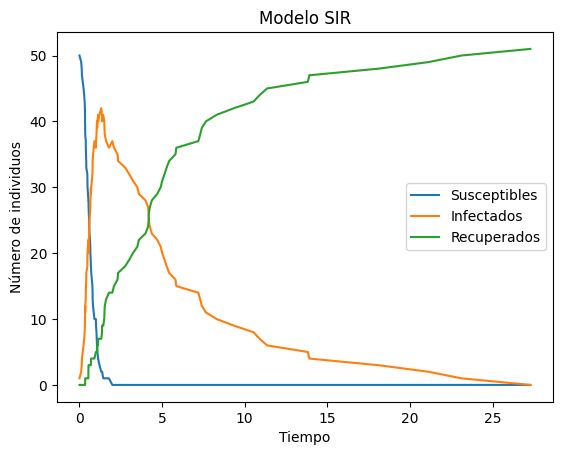

In [24]:
## a)

import EoN as eon
import networkx as nx
import matplotlib.pyplot as plt
import random

# Simulamos la propagación de una enfermedad en el grafo utilizando un modelo SIR

# Definimos los parámetros del modelo SIR
tau = 0.5   # Tasa de infección
gamma = 0.2  # Tasa de recuperación

# Calculamos la simulación SIR con vacunación
# Especificamos como nodo inicial el nodo mas conectado
t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={nodo_mas_conectado})

## b)

# Encontramos el valor y tiempo pico de infectados
# El tiempo en el que I alcanza su valor máximo
tiempo_pico = np.round(t[np.argmax(I)],2)
max_infec = np.max(I)

# Mostramos el resultado
print(f"El pico de infectados es: {max_infec}.")
print(f"El tiempo pico de infectados es: {tiempo_pico} unidades de tiempo.")

# Mostramos los resultados
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo")
plt.ylabel("Número de individuos")
plt.legend()
plt.title(f"Modelo SIR")
plt.show()

El pico de infectados es: 46.
El tiempo pico de infectados es: 1.62 unidades de tiempo.


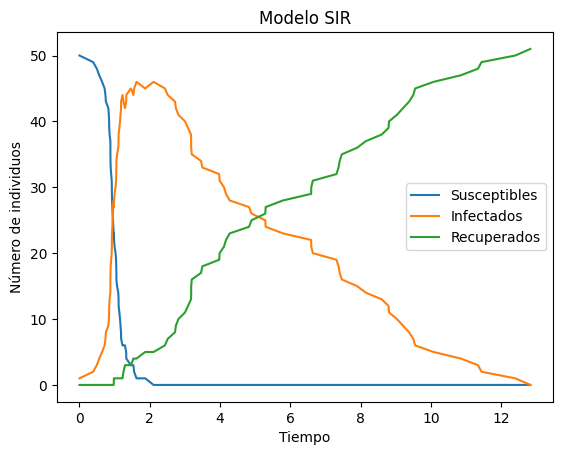

In [25]:
## c1) Usamos como nodo inicial el menos conectado


# Definimos los parámetros del modelo SIR
tau = 0.5   # Tasa de infección
gamma = 0.2  # Tasa de recuperación

# Calculamos la simulación SIR con vacunación
# Especificamos como nodo inicial el nodo menos conectado
t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={nodo_menos_conectado})

# Encontramos el valor y tiempo pico de infectados
# El tiempo en el que I alcanza su valor máximo
tiempo_pico = np.round(t[np.argmax(I)],2)
max_infec = np.max(I)

# Mostramos el resultado
print(f"El pico de infectados es: {max_infec}.")
print(f"El tiempo pico de infectados es: {tiempo_pico} unidades de tiempo.")

# Mostramos los resultados
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo")
plt.ylabel("Número de individuos")
plt.legend()
plt.title(f"Modelo SIR")
plt.show()

El grado del nodo inicial 37 es: 9
El pico de infectados es: 41.
El tiempo pico de infectados es: 2.55 unidades de tiempo.


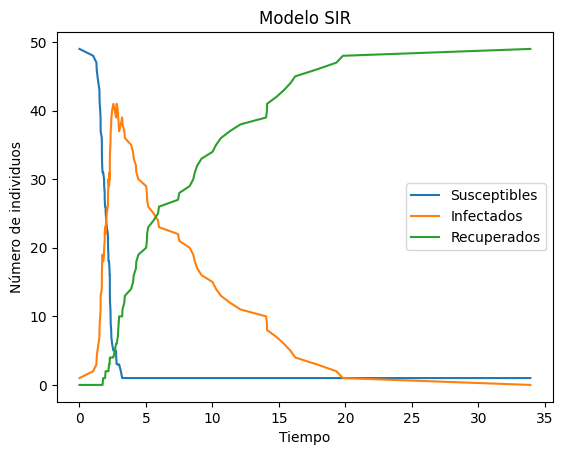

In [26]:
## c2) Eliminamos nodo más conectado

G2 = G.copy()

nodo_a_remover = nodo_mas_conectado
G2.remove_node(nodo_a_remover)

# Definimos los parámetros del modelo SIR
tau = 0.5   # Tasa de infección
gamma = 0.2  # Tasa de recuperación

# Elegimos un nodo inicial infectado que no esté vacunado
nodos_posibles= [n for n in G.nodes]
nodo_inicial = random.choice(nodos_posibles)

# Calculamos el grado del nodo inicial
grado = G.degree(nodo_inicial)

print(f"El grado del nodo inicial {nodo_inicial} es: {grado}")

# Calculamos la simulación SIR con vacunación
# Especificamos como nodo inicial el nodo menos conectado
t, S, I, R = eon.fast_SIR(G2, tau=tau, gamma=gamma, initial_infecteds={nodo_inicial})

# Encontramos el valor y tiempo pico de infectados
# El tiempo en el que I alcanza su valor máximo
tiempo_pico = np.round(t[np.argmax(I)],2)
max_infec = np.max(I)

# Mostramos el resultado
print(f"El pico de infectados es: {max_infec}.")
print(f"El tiempo pico de infectados es: {tiempo_pico} unidades de tiempo.")

# Mostramos los resultados
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo")
plt.ylabel("Número de individuos")
plt.legend()
plt.title(f"Modelo SIR")
plt.show()

El pico de infectados es: 42.
El tiempo pico de infectados es: 0.85 unidades de tiempo.


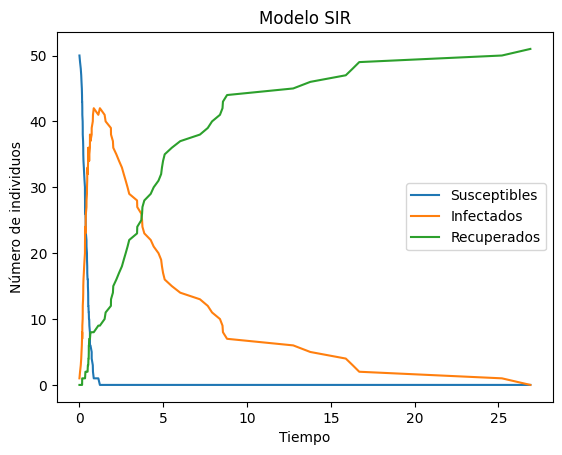

In [27]:
# c3) Simulamos la propagación con distintos valores de las tasas

# Definimos los parámetros del modelo SIR
tau = 0.8   # Tasa de infección
gamma = 0.2  # Tasa de recuperación

# Calculamos la simulación SIR con vacunación
# Especificamos como nodo inicial el nodo mas conectado
t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={nodo_mas_conectado})

# Encontramos el valor y tiempo pico de infectados
# El tiempo en el que I alcanza su valor máximo
tiempo_pico = np.round(t[np.argmax(I)],2)
max_infec = np.max(I)

# Mostramos el resultado
print(f"El pico de infectados es: {max_infec}.")
print(f"El tiempo pico de infectados es: {tiempo_pico} unidades de tiempo.")

# Mostramos los resultados
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo")
plt.ylabel("Número de individuos")
plt.legend()
plt.title(f"Modelo SIR")
plt.show()

El pico de infectados es: 26.
El tiempo pico de infectados es: 1.52 unidades de tiempo.


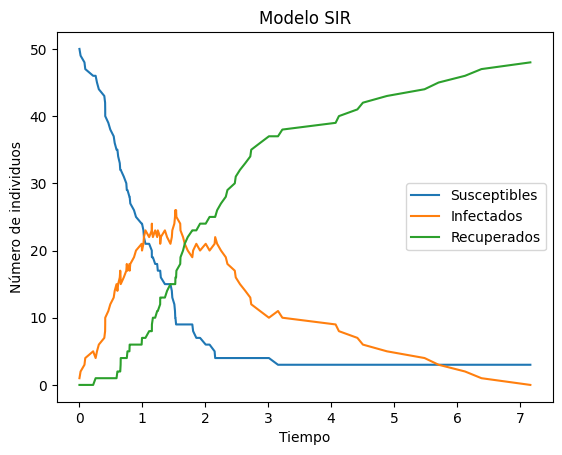

In [28]:
# c3) Simulamos la propagación con distintos valores de las tasas

# Definimos los parámetros del modelo SIR
tau = 0.5   # Tasa de infección
gamma = 0.5  # Tasa de recuperación

# Calculamos la simulación SIR con vacunación
# Especificamos como nodo inicial el nodo mas conectado
t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={nodo_mas_conectado})

# Encontramos el valor y tiempo pico de infectados
# El tiempo en el que I alcanza su valor máximo
tiempo_pico = np.round(t[np.argmax(I)],2)
max_infec = np.max(I)

# Mostramos el resultado
print(f"El pico de infectados es: {max_infec}.")
print(f"El tiempo pico de infectados es: {tiempo_pico} unidades de tiempo.")

# Mostramos los resultados
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo")
plt.ylabel("Número de individuos")
plt.legend()
plt.title(f"Modelo SIR")
plt.show()

**Inicio: nodo más conectado**

- El pico de infectados es: 45.
- El tiempo pico de infectados es: 1.03 unidades de tiempo.

Iniciar la infección desde el nodo más conectado da lugar una propagación muy rápida y un pico de infectados más alto. Esto se debe a que el nodo tiene muchas conexiones y transmite la enfermedad a un gran número de vecinos.

**Inicio: nodo menos conectado**
- El pico de infectados es: 43.
- El tiempo pico de infectados es: 2.53 unidades de tiempo.

Si iniciamos en un nodo poco conectado, la propagación es más lenta y se llega al pico más tarde. Aunque el número máximo de infectados es parecido al caso anterior, el proceso de contagio es menos eficiente.

**Eliminamos nodo más conectado**
- El pico de infectados es: 40.
- El tiempo pico de infectados es: 2.69 unidades de tiempo.

Al eliminar el nodo más conectado, se reduce el pico de infectados y se ralentiza la epidemia. Por lo tanto, eliminar un nodo conectado puede ayudar a cortar la cadena de contagios y controlar la transmición.

**Mayor tasa de infección**
- El pico de infectados es: 42.
- El tiempo pico de infectados es: 0.67 unidades de tiempo.

Si augmentamos la tasa de infección, la enfermedad se propaga más rápido, alcanzando el pico en menos tiempo. Sin embargo, el número máximo de infectados no aumenta. Esto puede indicar que la red ya estaba cerca de su capacidad de contagio.

**Mayor tasa de recuperación**
- El pico de infectados es: 26.
- El tiempo pico de infectados es: 1.52 unidades de tiempo.

Al augmentar la tasa de recuperación, se reduce significativamente el número de personas infectadas en el pico, pasando de 40-45 a solo 26. Esto muestra que una recuperación más rápida limita la propagación, ya que los infectados tienen menos tiempo para contagiar a otros.

El pico de infectados es: 30.
El tiempo pico de infectados es: 1.87 unidades de tiempo.


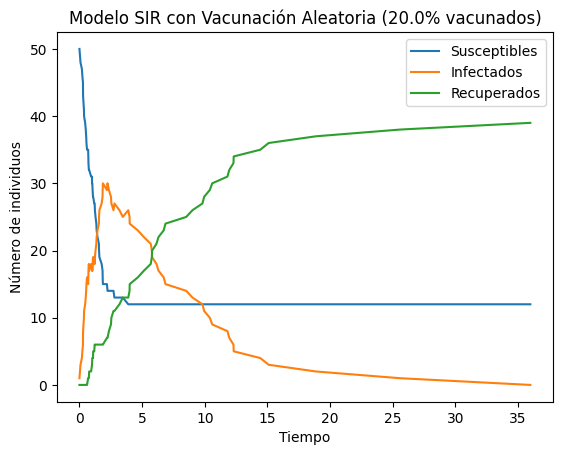

In [30]:
# d) Simulamos el efecto de la vacunación en el 20% de la población

# Definimos el porcentaje de vacunación (20%)
vacunacion_porcentaje = 0.2

# Seleccionamos nodos vacunados aleatoriamente
num_vacunados = int(N * vacunacion_porcentaje)
vacunados = set(random.sample(list(G.nodes), num_vacunados))

# Elegimos un nodo inicial infectado que no esté vacunado
susceptibles_no_vacunados = [n for n in G.nodes if n not in vacunados]
nodo_inicial = random.choice(susceptibles_no_vacunados)

# Definimos los parámetros del modelo SIR
tau = 0.3   # Tasa de infección
gamma = 0.2  # Tasa de recuperación

# Calculamos la simulación SIR con vacunación
t, S, I, R = eon.fast_SIR(G, tau=tau, gamma=gamma, initial_infecteds={nodo_mas_conectado}, initial_recovereds=vacunados)

# Encontramos el valor y tiempo pico de infectados
# El tiempo en el que I alcanza su valor máximo
tiempo_pico = np.round(t[np.argmax(I)],2)
max_infec = np.max(I)

# Mostramos el resultado
print(f"El pico de infectados es: {max_infec}.")
print(f"El tiempo pico de infectados es: {tiempo_pico} unidades de tiempo.")

# Mostramos los resultados
plt.plot(t, S, label="Susceptibles")
plt.plot(t, I, label="Infectados")
plt.plot(t, R, label="Recuperados")
plt.xlabel("Tiempo")
plt.ylabel("Número de individuos")
plt.legend()
plt.title(f"Modelo SIR con Vacunación Aleatoria ({vacunacion_porcentaje*100}% vacunados)")
plt.show()

Si consideramos que el 20% de los nodos está vacunado y, por lo tanto, no puede infectarse, reducimos el número máximo de infectados, bajando el pico a 34 frente a los 40-45 del escenario sin vacunación. Además, también se retrasa ligeramente el pico, lo que indica que la propagación inicial es más lenta.